<a href="https://colab.research.google.com/github/aknsntn/ICT.HACK-IV/blob/main/Tables_and_Visualisation_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуальный анализ

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных композиций.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

> **NB!** *Для выполнения задания возьмите 30 тысяч случайных строк из датасета.*

In [ ]:
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("cowplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(repr)
library(ggplot2)
library(cowplot)

In [ ]:
data <- read_csv("/content/sample_data/music_genre.csv")

In [ ]:
head(data, n=3)

instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
32894,Röyksopp,Röyksopp's Night Out,27,0.00468,0.652,-1,0.941,0.7920,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
46652,Thievery Corporation,The Shining Path,31,0.01270,0.622,218293,0.890,0.9500,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
30097,Dillon Francis,Hurricane,28,0.00306,0.620,215613,0.755,0.0118,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic


In [ ]:
df <- data[!(data$duration_ms<0 | data$artist_name=="empty_field" | data$tempo=="?"),]

In [ ]:
df <- drop_na(df)

In [ ]:
nrow(df)

[1] 38556

In [ ]:
df <- df[sample(nrow(df), 30000, replace = FALSE, prob = NULL),]

## Задание 1

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

In [ ]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
options(repr.plot.width=12, repr.plot.height=12)

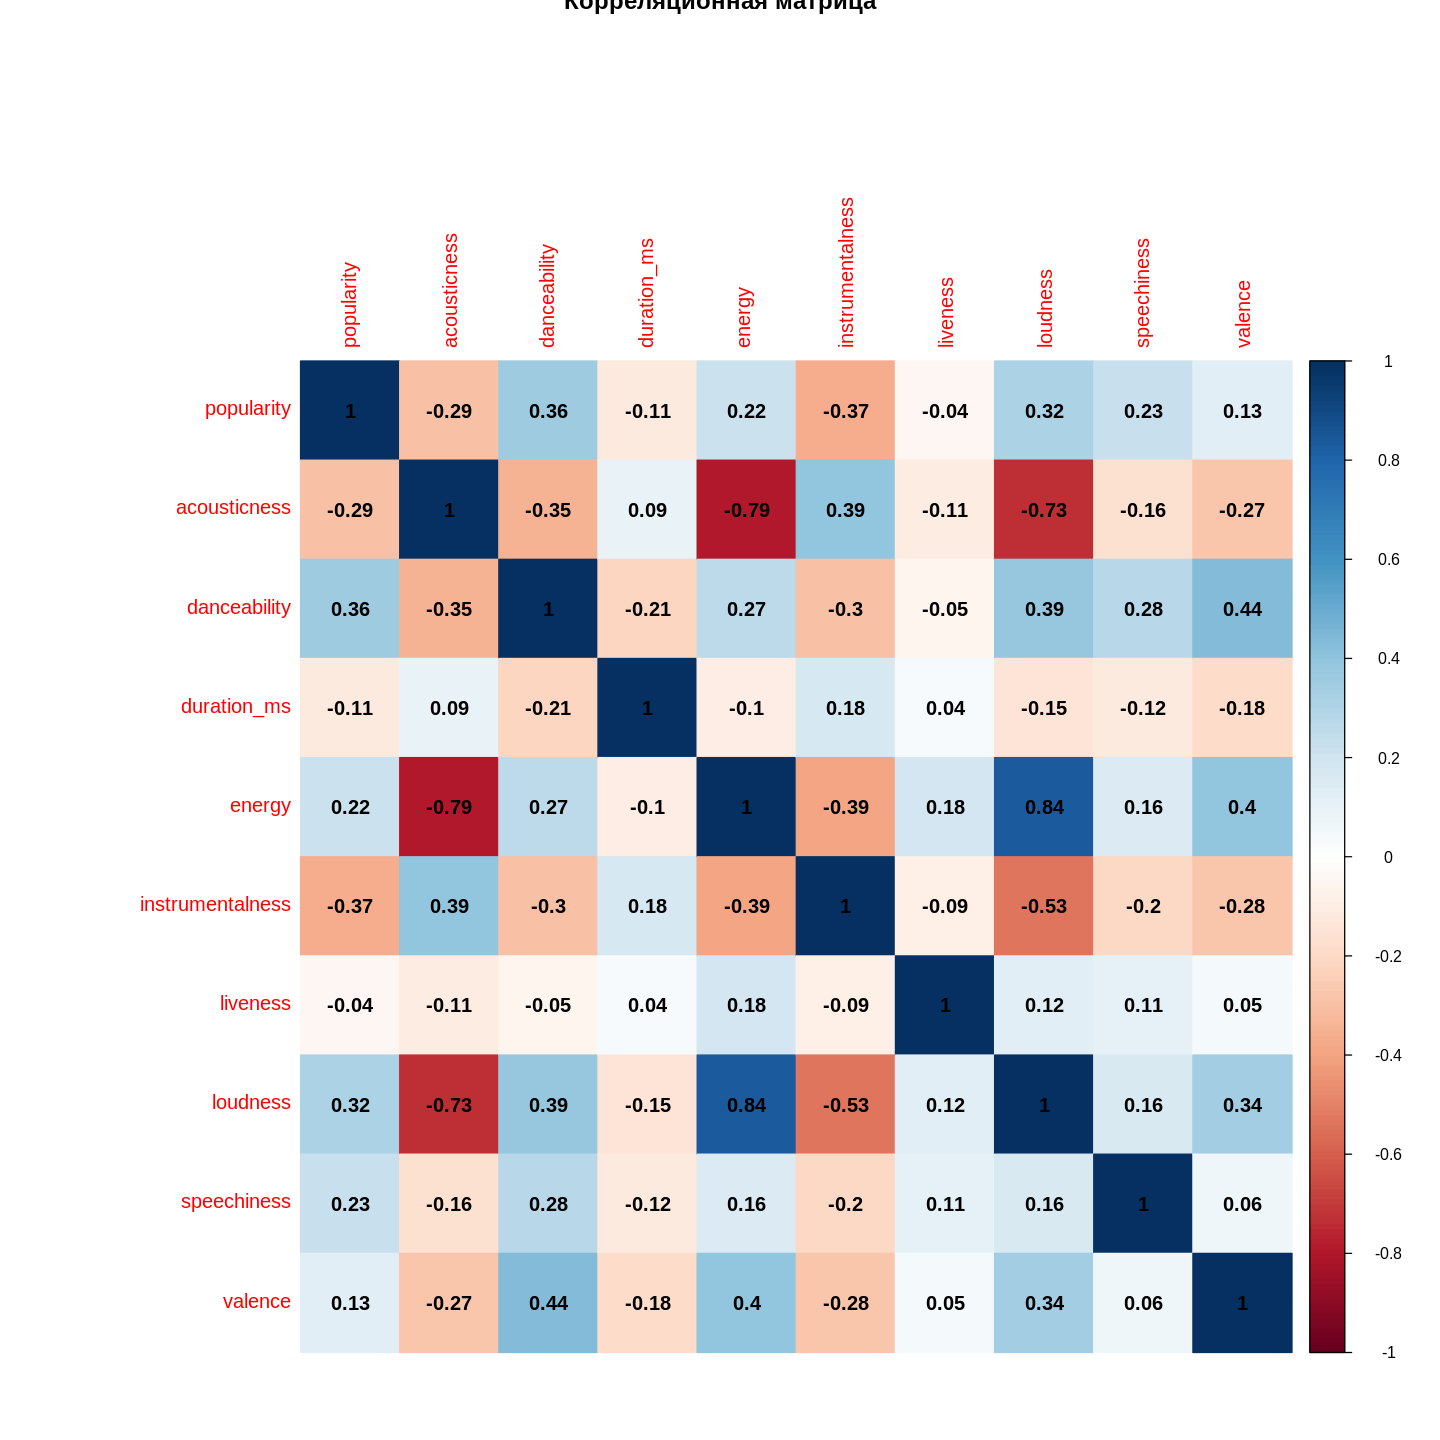

In [ ]:
corrplot(cor(df[c("popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence")]), method="color", addCoef.col = 'black', title = "Корреляционная матрица", tl.cex = 1)

Таким образом, `duration_ms` слабо влияет на какие-либо характеристики, так как его корреляции с другими столбцами ближе всего к 0. 

Сильно связаны `energy` и `loudness` - корреляция 0.84.

Высокую отрицательную корреляцию имеют пары `energy` и `acousticness`, `loudness` и `acousticness`, что говорит об их обратных зависимостях.

## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

In [ ]:
options(repr.plot.width=22, repr.plot.height=16)

In [ ]:
t <- ggplot(df, aes(x=acousticness, y=energy, color = "brown1")) + geom_point() + ggtitle("Разброс acousticness к energy")
t2 <- ggplot(df, aes(x=acousticness, y=loudness, color = "brown1")) + geom_point() + ggtitle("Разброс acousticness к loudness")
t3 <- ggplot(df, aes(x=instrumentalness, y=loudness, color = "brown1")) + geom_point() + ggtitle("Разброс ainstrumentalness к loudness")

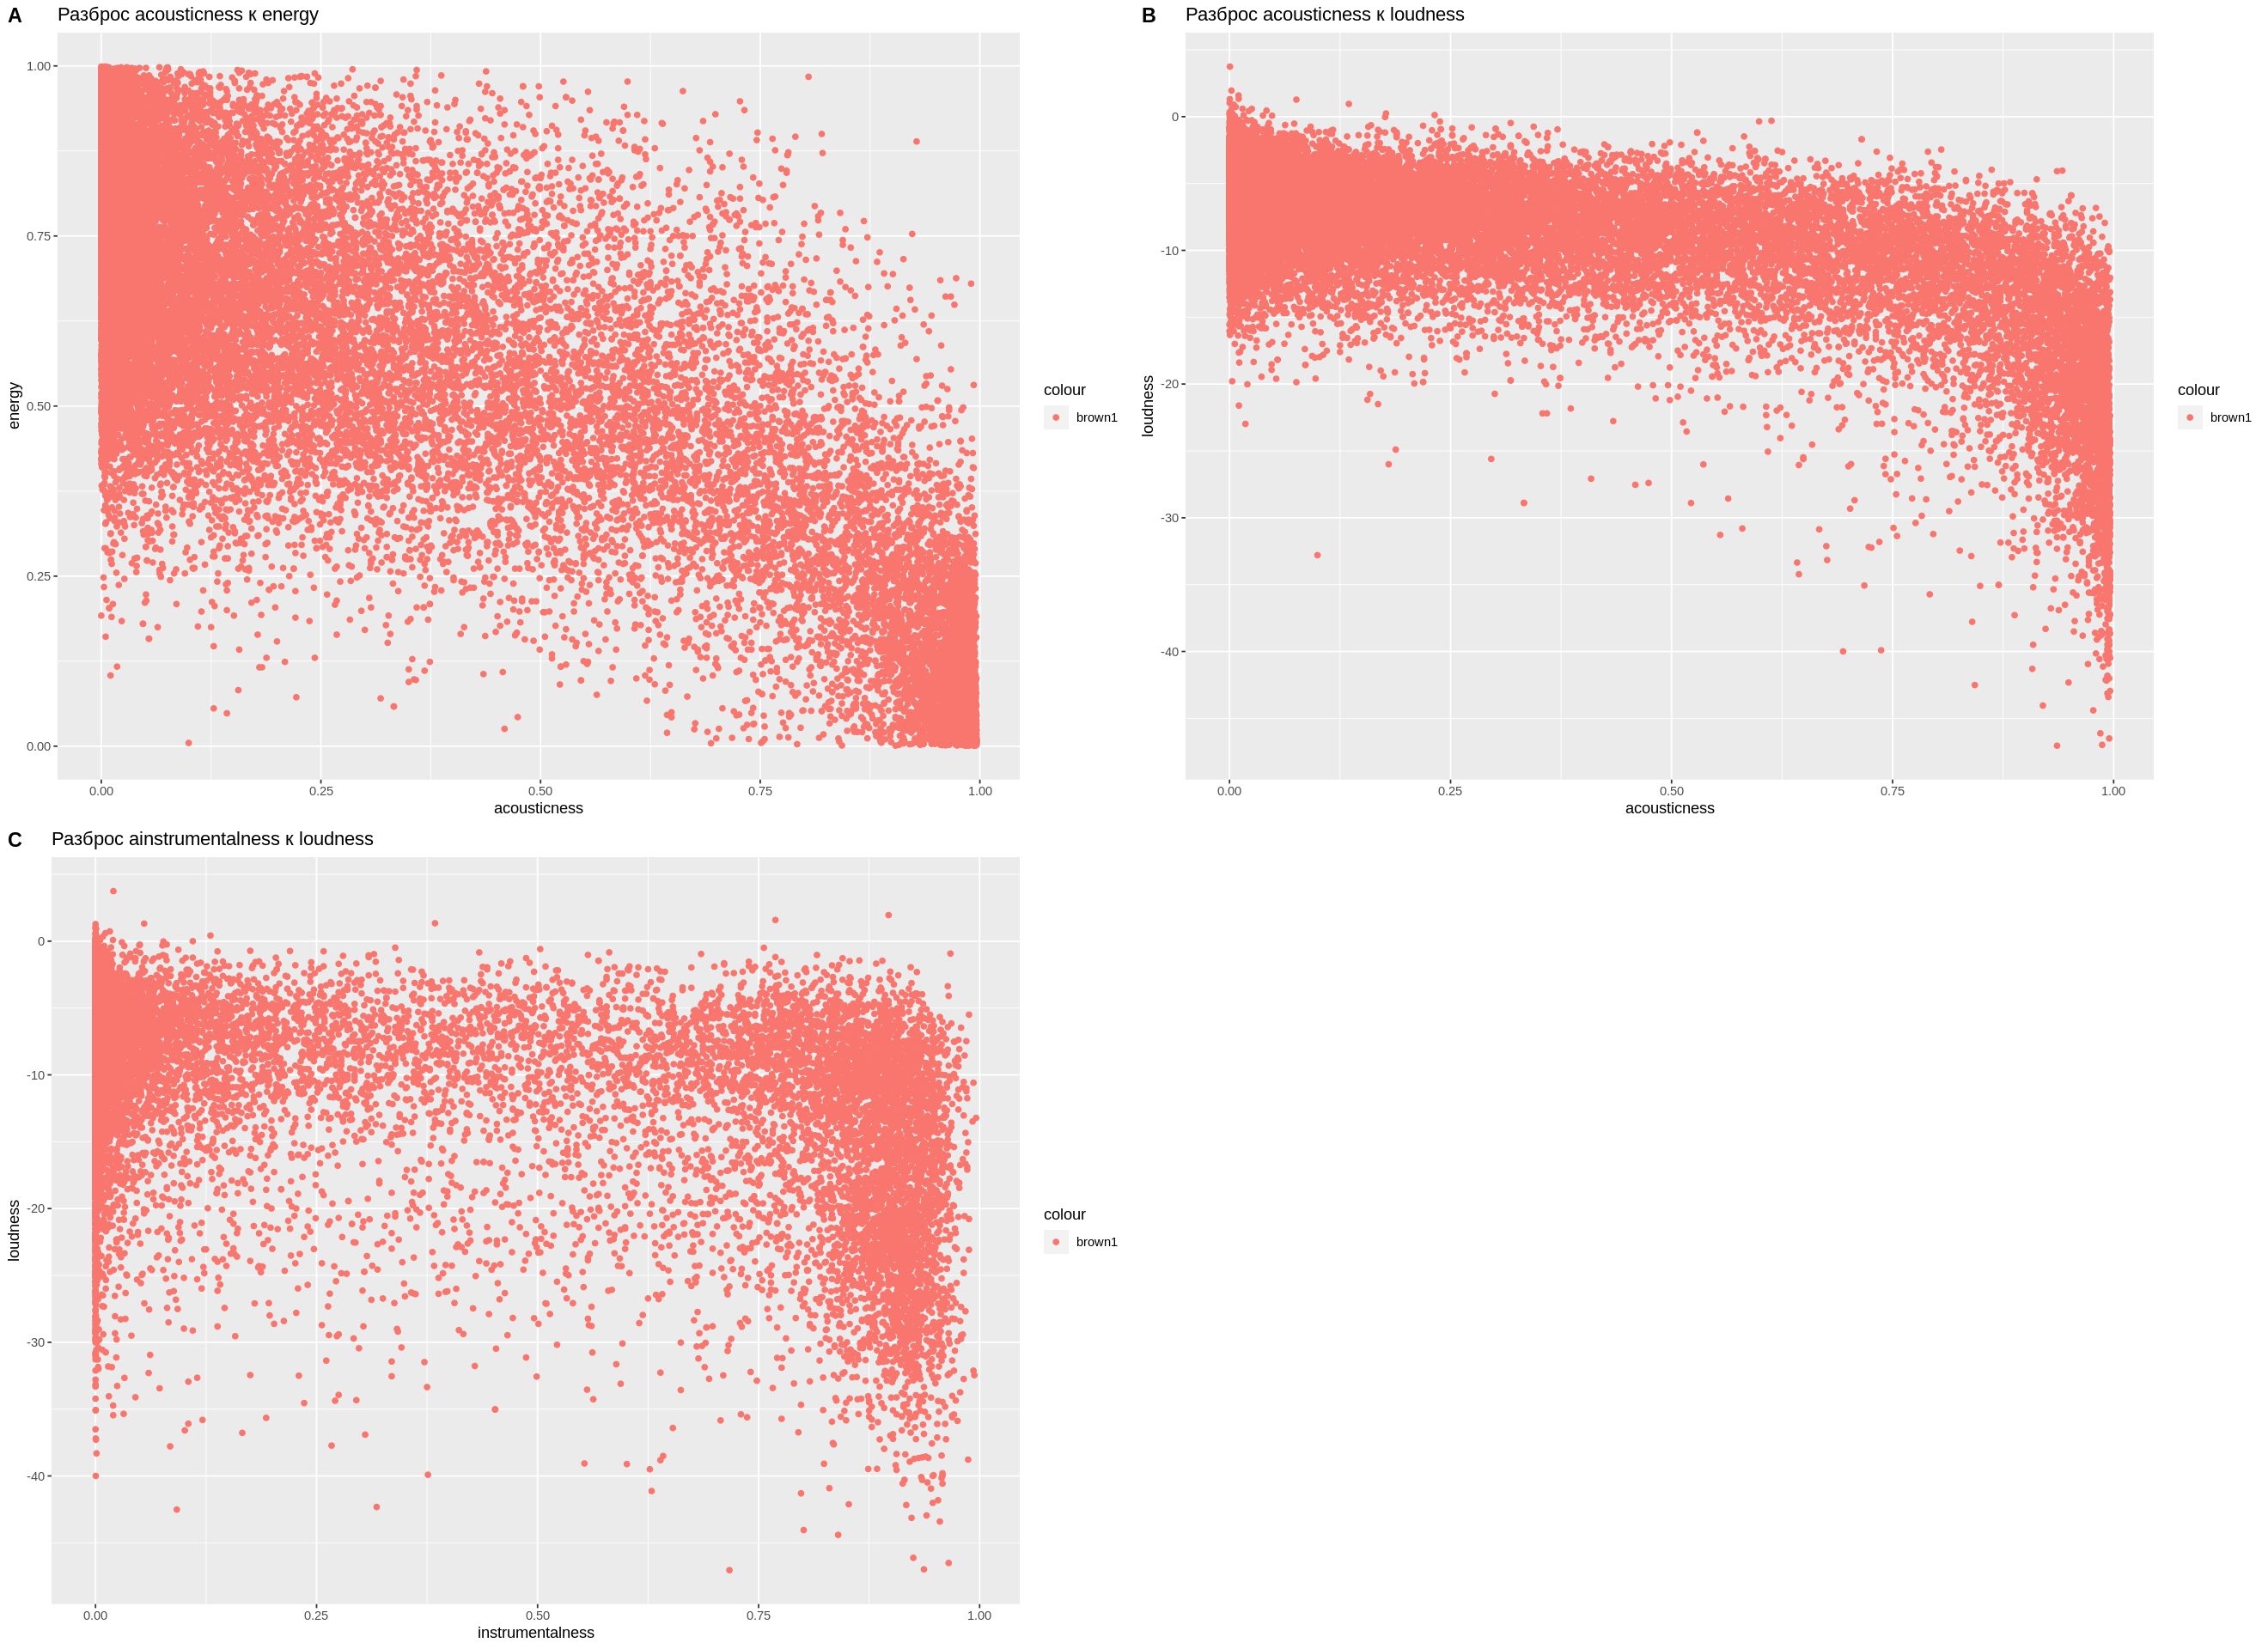

In [ ]:
plot_grid(t, t2, t3, labels = "AUTO")

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

In [ ]:
count <- count(df, music_genre, sort = TRUE)

In [ ]:
count$music_genre <- factor(count$music_genre, levels = count$music_genre[order(count$n)])

In [ ]:
count <- count %>% mutate(best = ifelse(n == max(n), "t", "f"))

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)

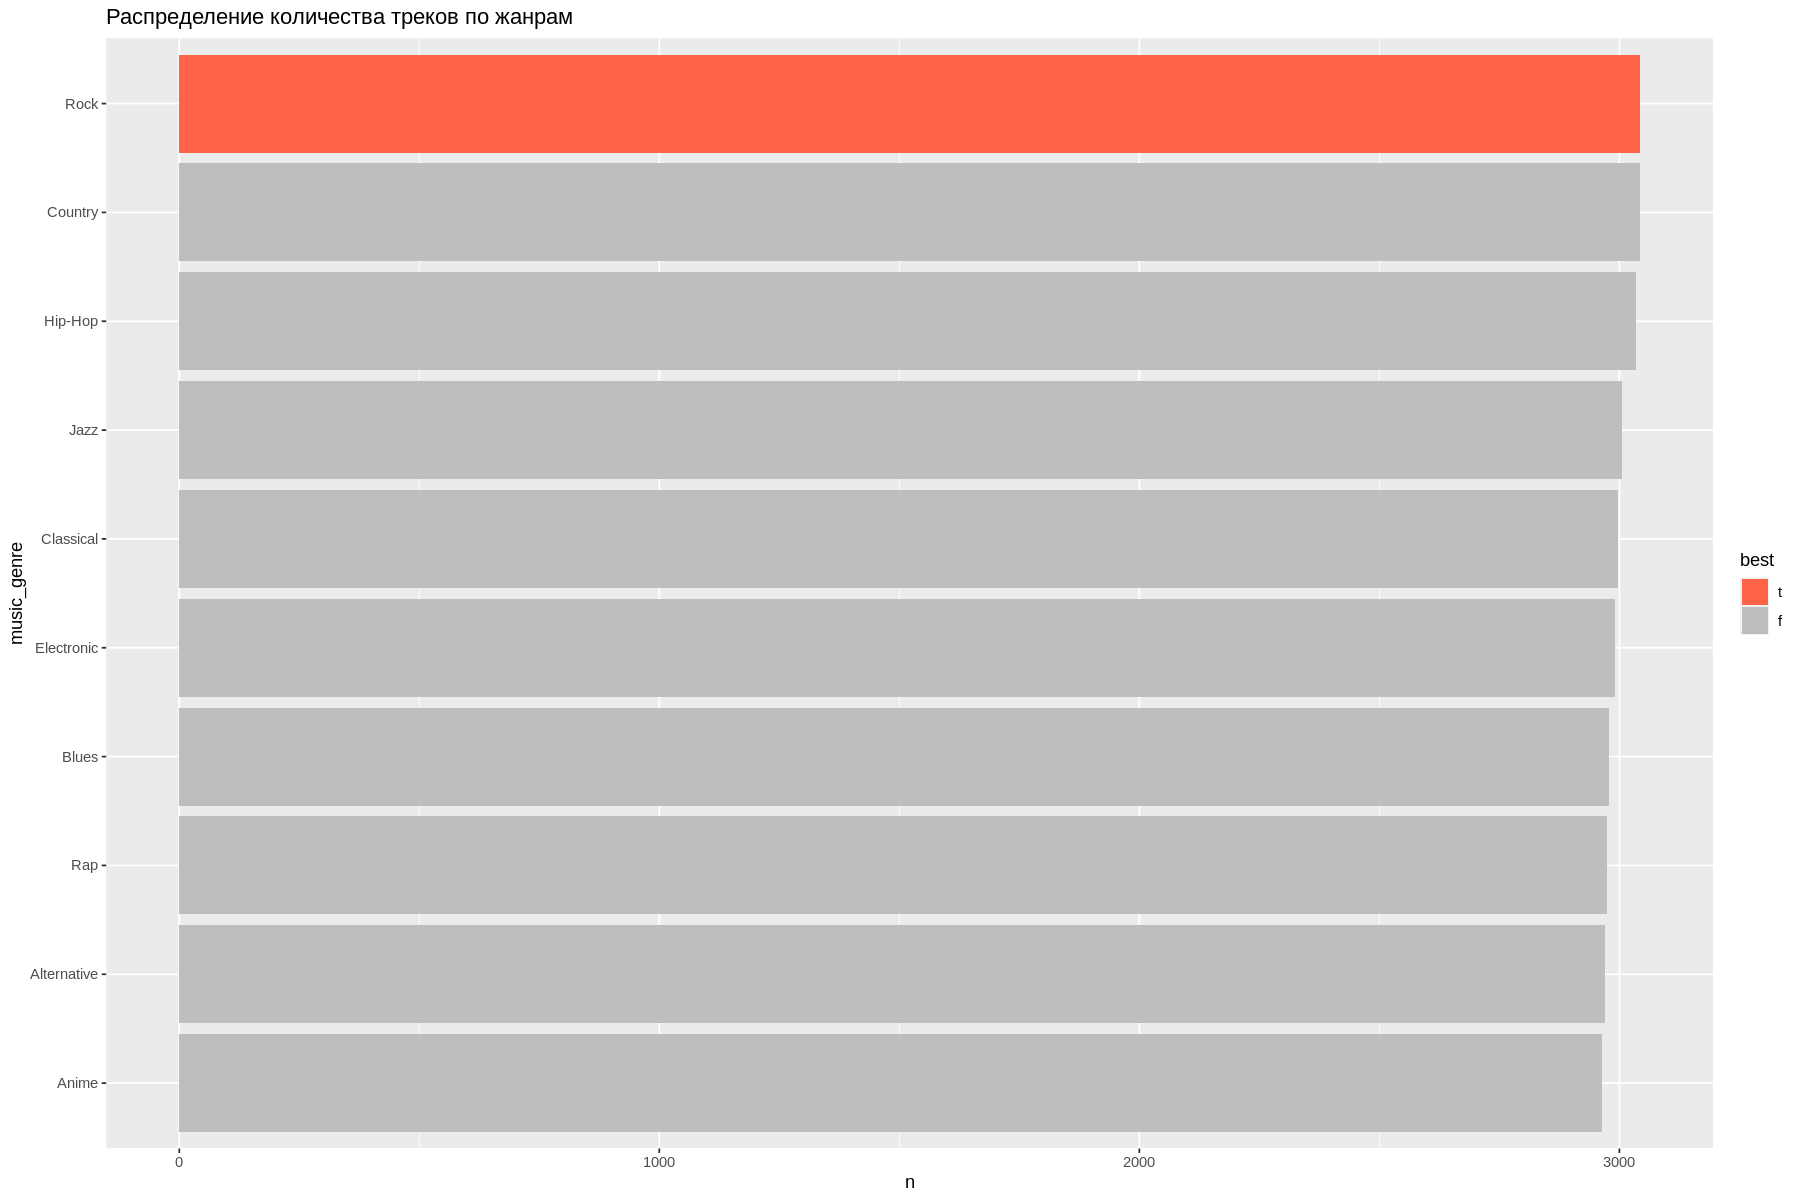

In [ ]:
ggp <- ggplot(count, aes(music_genre, n, fill = best)) + geom_bar(stat = "identity") + scale_fill_manual(values = c("t" = "tomato", "f" = "gray"))

ggp + coord_flip() + ggtitle("Распределение количества треков по жанрам")

## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

In [ ]:
top_df <- head(count, 3)
genres <- top_df$music_genre

In [ ]:
top_df <- merge(top_df, df, by = "music_genre")

In [ ]:
top_1 <- head(top_df[(top_df$music_genre == genres[1]),] %>% group_by(music_genre, artist_name) %>% summarise(popularity = sum(popularity)) %>% arrange(desc(popularity)), n = 3)
top_2 <- head(top_df[(top_df$music_genre == genres[2]),] %>% group_by(music_genre, artist_name) %>% summarise(popularity = sum(popularity)) %>% arrange(desc(popularity)), n = 3)
top_3 <- head(top_df[(top_df$music_genre == genres[3]),] %>% group_by(music_genre, artist_name) %>% summarise(popularity = sum(popularity)) %>% arrange(desc(popularity)), n = 3)

In [ ]:
top <- merge(top_1, top_2, all = TRUE)
top <- merge(top, top_3, all = TRUE)

In [ ]:
top$artist_name <- factor(top$artist_name)
top$music_genre <- factor(top$music_genre)

In [ ]:
names(top)[1] <- "name"
names(top)[2] <- "type"
names(top)[3] <- "value"

In [ ]:
lvl1 <- top %>%
    group_by(name) %>%
    summarise(value = sum(value)) %>%
    ungroup() %>%
    mutate(level = 1) %>%
    mutate(fill = name)

lvl2 <- top %>%
    select(name = type, value, fill = name) %>%
    mutate(level = 2)


 p <- bind_rows(lvl1, lvl2) %>%
    mutate(name = as.factor(name) %>% fct_reorder2(fill, value)) %>%
    arrange(fill, name) %>%
    mutate(level = as.factor(level)) %>%
    ggplot(aes(x = level, y = value, fill = fill, alpha = level)) +
        geom_col(width = 1, color = "gray90", size = 0.25, position = position_stack()) +
        geom_text(aes(label = name), size = 5, position = position_stack(vjust = 0.5)) +
        coord_polar(theta = "y") +
        scale_alpha_manual(values = c("0" = 0, "1" = 1, "2" = 0.7), guide = F) +
        scale_x_discrete(breaks = NULL) +
        scale_y_continuous(breaks = NULL) +
        scale_fill_brewer(palette = "Dark2", na.translate = F) +
        labs(x = NULL, y = NULL) + ggtitle("Топ-3 популярных исполнителей для топ-3 жанров")
        theme_minimal()

Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


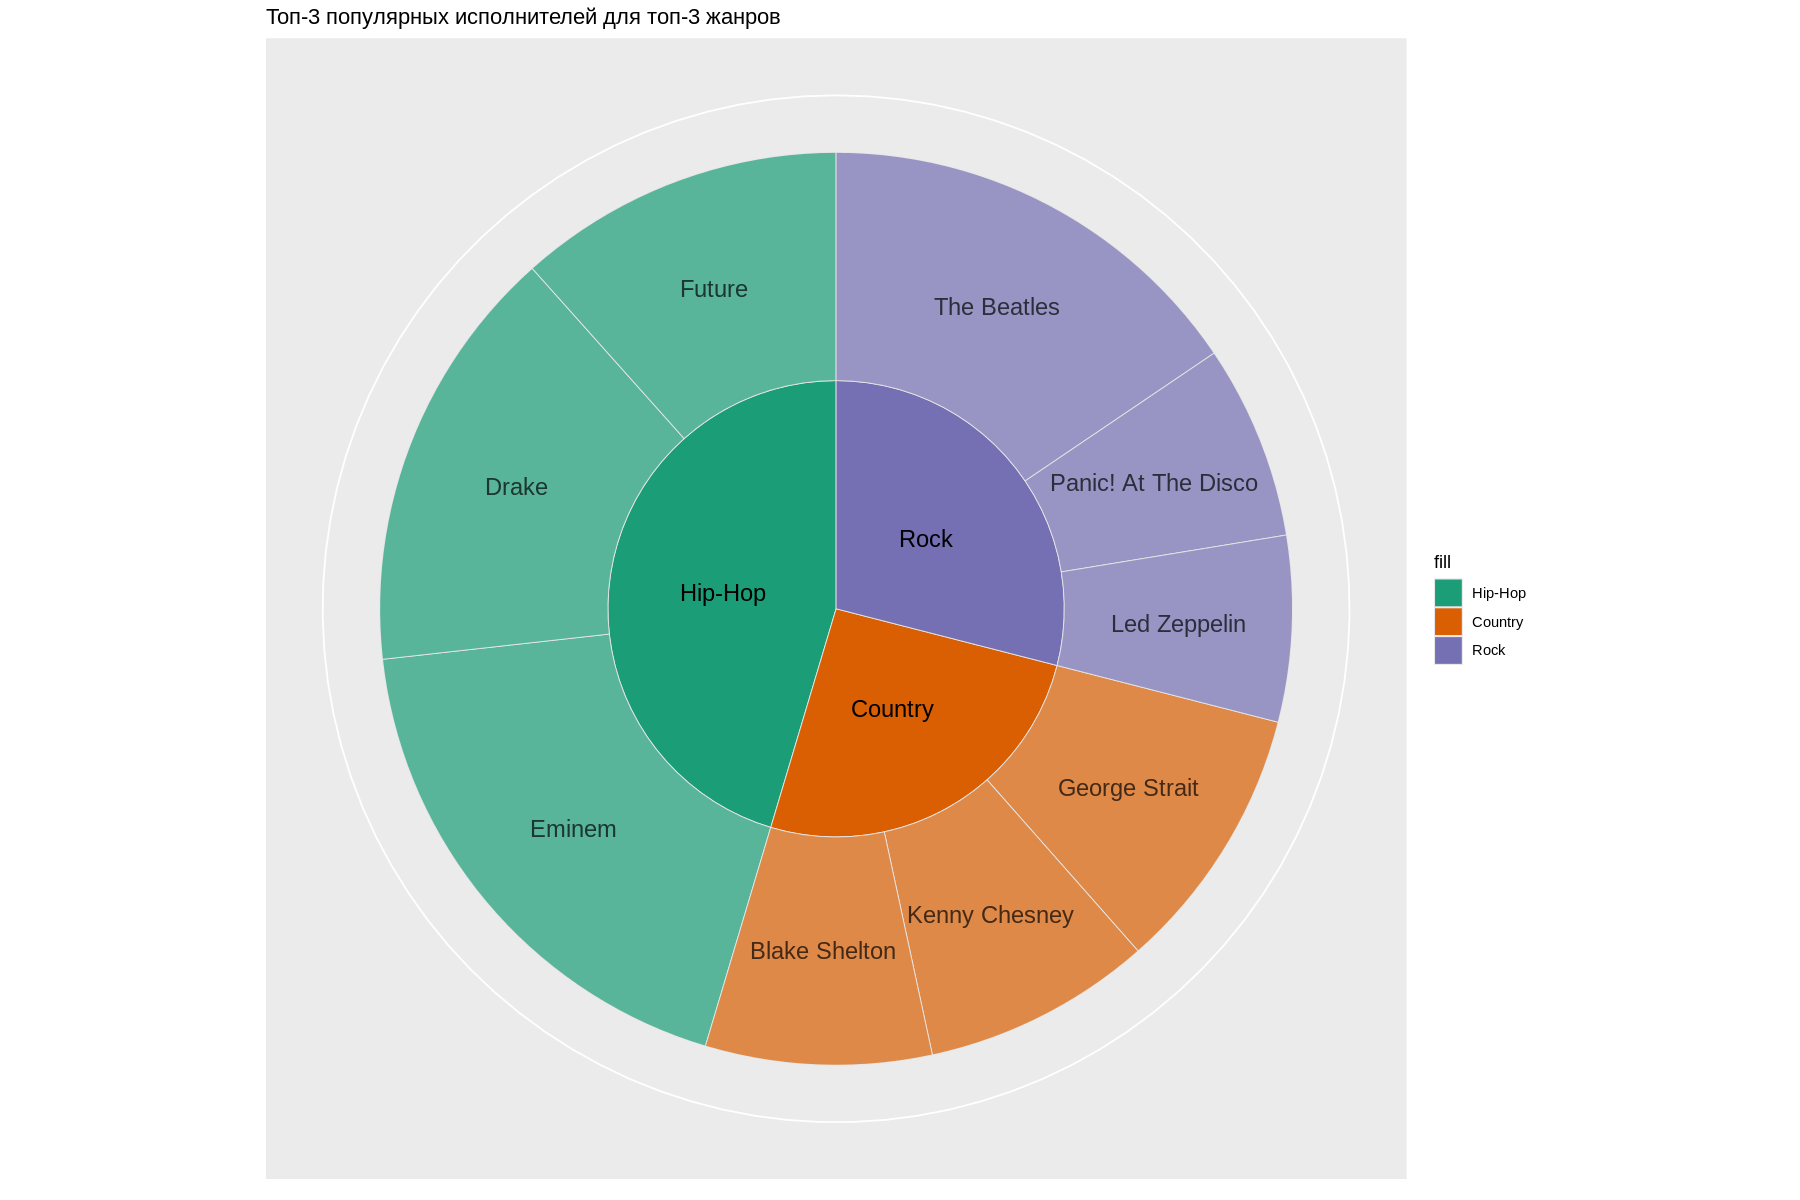

In [ ]:
p

## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

In [ ]:
most_popular <- tail(df %>% group_by(music_genre) %>% summarise(popularity = mean(popularity), acousticness = mean(acousticness), danceability = mean(danceability), energy = mean(energy), instrumentalness =  mean(instrumentalness), liveness = mean(liveness), loudness = mean(loudness), speechiness = mean(speechiness), valence = mean(valence)), 1)
least_popular <- head(df %>% group_by(music_genre) %>% summarise(popularity = mean(popularity), acousticness = mean(acousticness), danceability = mean(danceability), energy = mean(energy), instrumentalness =  mean(instrumentalness), liveness = mean(liveness), loudness = mean(loudness), speechiness = mean(speechiness), valence = mean(valence)), 1)

In [ ]:
least_popular <- least_popular[,!grepl("popularity", names(least_popular))]
most_popular <- most_popular[,!grepl("popularity", names(most_popular))]

In [ ]:
sub <- abs(most_popular[,!grepl("music_genre", names(most_popular))] - least_popular[,!grepl("music_genre", names(least_popular))]) %>% t() %>% as.data.frame() %>% arrange(desc(V1))

In [ ]:
sub

,V1
,<dbl>
loudness,0.767671198
valence,0.074420147
speechiness,0.036091513
acousticness,0.032525375
energy,0.025943390
liveness,0.007919856
instrumentalness,0.003655482
danceability,0.001236943


In [ ]:
max_sub <- head(sub, 4)
min_sub <- tail(sub, 4)

In [ ]:
most_popular <- most_popular %>% t() %>% as.data.frame()
least_popular <- least_popular %>% t() %>% as.data.frame()

In [ ]:
row_names1 <- c(row.names(max_sub))
row_names2 <- c(row.names(min_sub))

In [ ]:
most_popular1 <- subset(most_popular, row.names(most_popular) %in% row_names1)
least_popular1 <- subset(least_popular, row.names(least_popular) %in% row_names1)

In [ ]:
most_popular1

,V1
,<dbl>
acousticness,0.19474320
loudness,-7.23969200
speechiness,0.05334328
valence,0.52331600


In [ ]:
most_popular1$V1 <- as.double(most_popular1$V1)
least_popular1$V1 <- as.double(least_popular1$V1)

In [ ]:
values_most1 <- c(most_popular1$V1)
values_least1 <- c(least_popular1$V1)

In [ ]:
bar1 <- data.frame(rows1, values_most1, values_least1)

In [ ]:
tbl1 <- bar1[,1:2] %>% rename(values = values_most1)
tbl2 <- bar1[,c(1,3)] %>% rename(values = values_least1)
tbl1$tag <- most_popular[1,1]
tbl2$tag <- least_popular[1,1]

In [ ]:
df_bar1 <- rbind(tbl1, tbl2)

In [ ]:
df_bar1

rows1,values,tag
<chr>,<dbl>,<chr>
acousticness,0.19474320,Rock
loudness,-7.23969200,Rock
speechiness,0.05334328,Rock
valence,0.52331600,Rock
acousticness,0.16221790,Alternative
loudness,-6.47202100,Alternative
speechiness,0.08943479,Alternative
valence,0.44889590,Alternative


In [ ]:
most_popular2 <- subset(most_popular, row.names(most_popular) %in% row_names2)
least_popular2 <- subset(least_popular, row.names(least_popular) %in% row_names2)

In [ ]:
most_popular2$V1 <- as.double(most_popular2$V1)
least_popular2$V1 <- as.double(least_popular2$V1)

In [ ]:
rows2 <- c(row.names(most_popular2))
values_most2 <- c(most_popular2$V1)
values_least2 <- c(least_popular2$V1)

In [ ]:
bar2 <- data.frame(rows2, values_most2, values_least2)

In [ ]:
tbl3 <- bar2[,1:2] %>% rename(values = values_most2)
tbl4 <- bar2[,c(1,3)] %>% rename(values = values_least2)
tbl3$tag <- most_popular[1,1]
tbl4$tag <- least_popular[1,1]

In [ ]:
df_bar2 <- rbind(tbl3, tbl4)

In [ ]:
df_bar2

rows2,values,tag
<chr>,<dbl>,<chr>
danceability,0.54180110,Rock
energy,0.68748670,Rock
instrumentalness,0.05465199,Rock
liveness,0.18776560,Rock
danceability,0.54303810,Alternative
energy,0.71343010,Alternative
instrumentalness,0.05830747,Alternative
liveness,0.19568540,Alternative


In [ ]:
p1 <- ggplot(df_bar1, aes(fill=tag, y=values, x=rows1)) + 
    geom_bar(position="dodge", stat="identity") +  coord_cartesian(ylim = c(-1, 2)) + ggtitle("Средние значения по хар-кам, в которых разница значений максимальна")

In [ ]:
p2 <- ggplot(df_bar2, aes(fill=tag, y=values, x=rows2)) + 
    geom_bar(position="dodge", stat="identity") + ggtitle("Средние значения по хар-кам, в которых разница значений минимальна")

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)

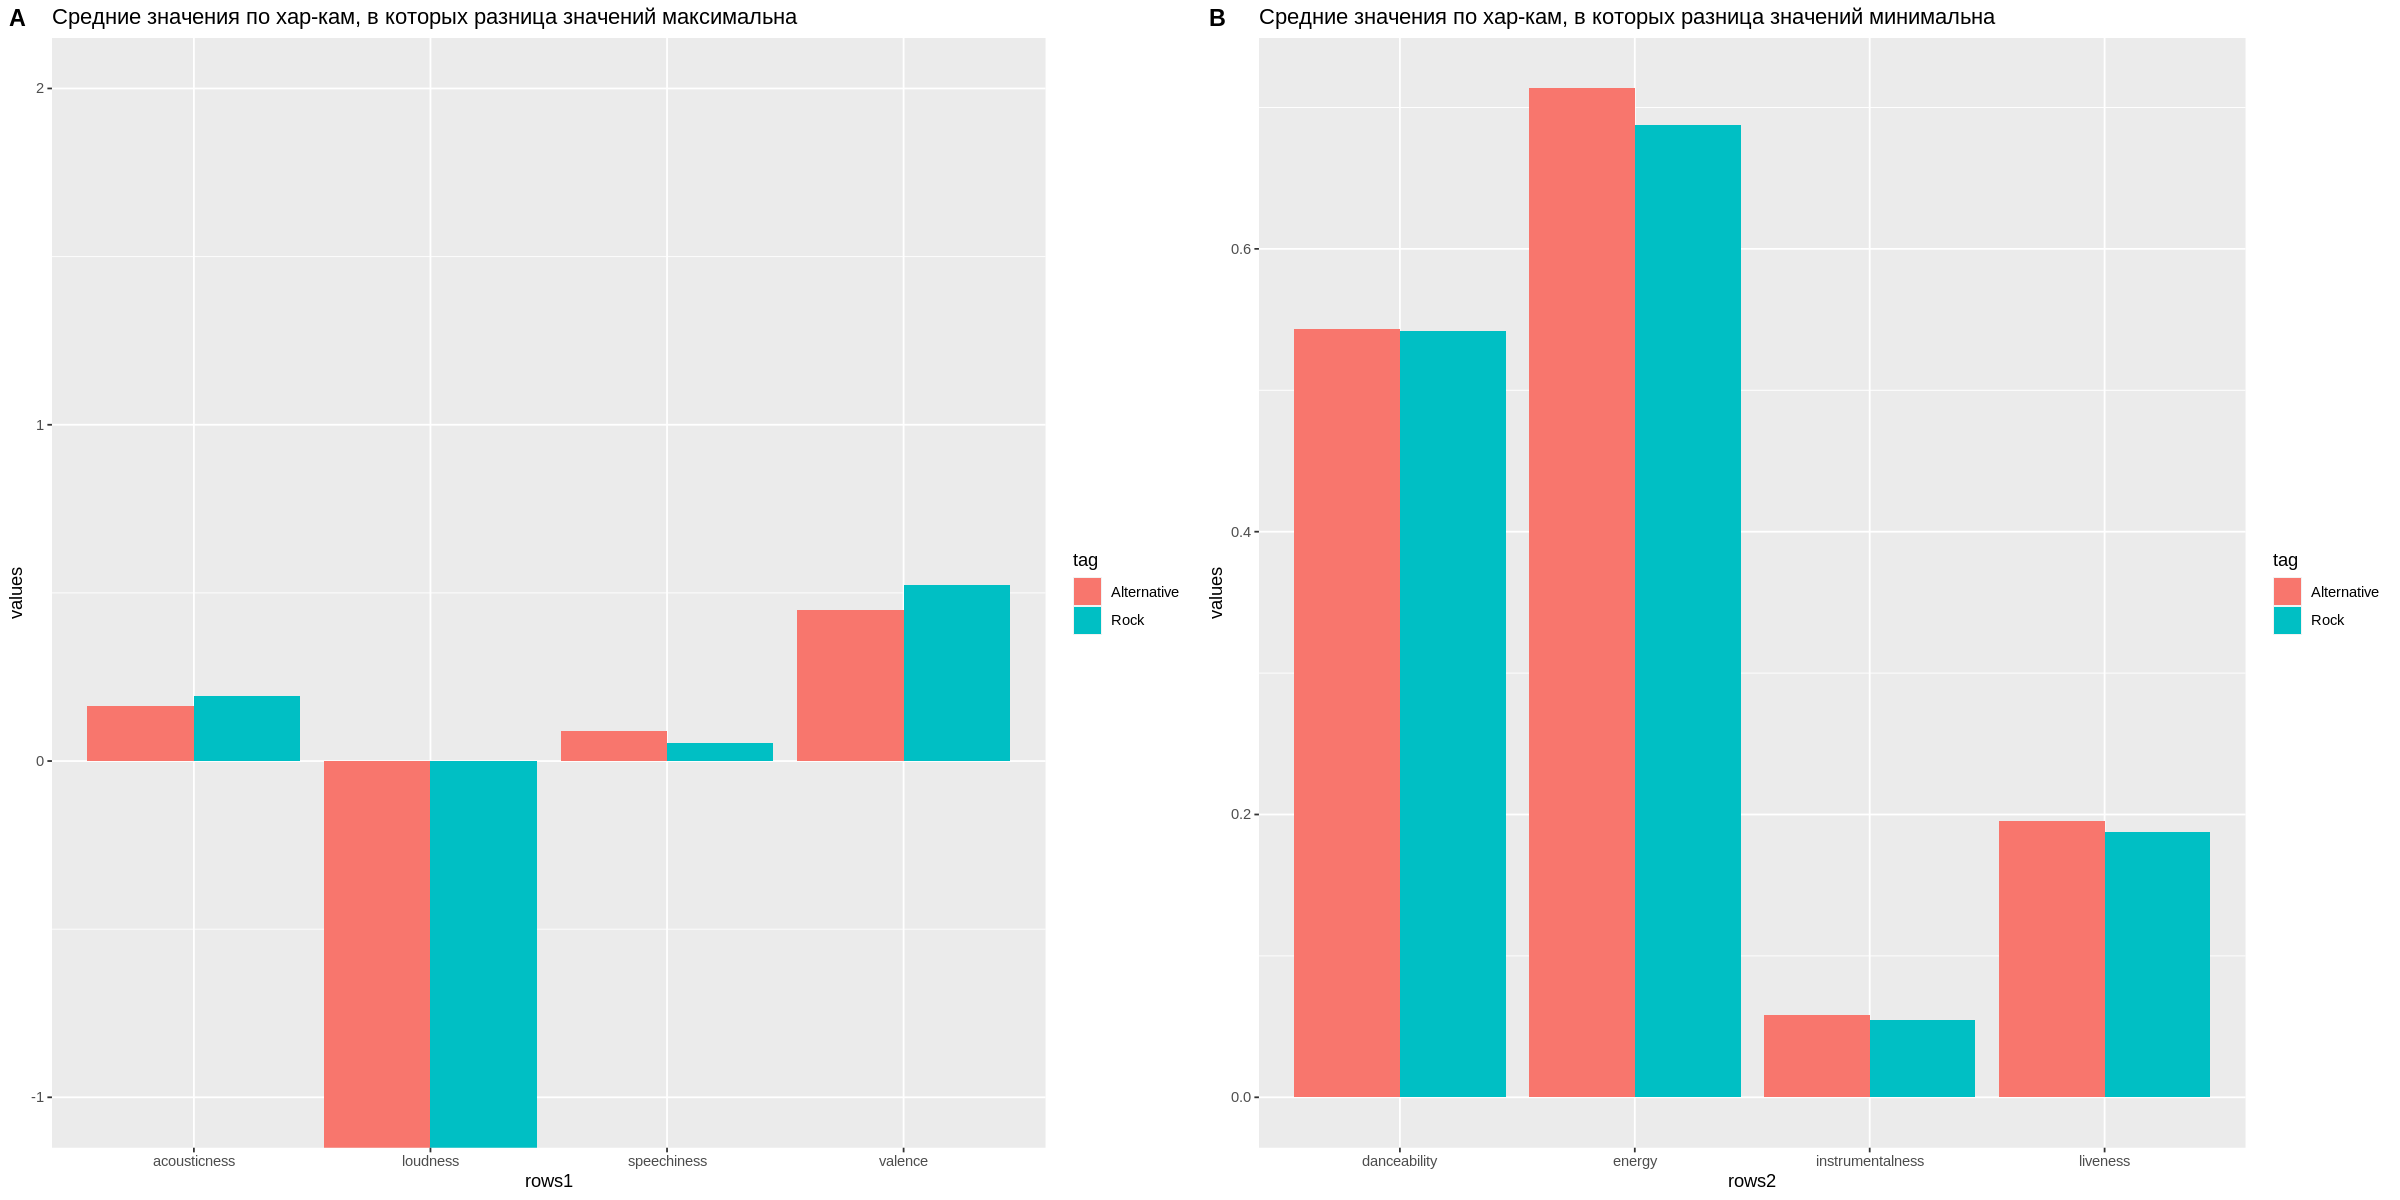

In [ ]:
plot_grid(p1, p2, labels = "AUTO")

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

In [ ]:
rownames(df) <- df$instance_id

Warning message:
“Setting row names on a tibble is deprecated.”


In [ ]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
} # функция для нахождения моды

In [ ]:
getmode(df$duration_ms)

[1] 240000

In [ ]:
step <- (getmode(df$duration_ms) - min(df$duration_ms))/2

In [ ]:
step

[1] 112245.5

In [ ]:
df_1 <- df[df$duration_ms <= (step + min(df$duration_ms)),]
df_2 <- df[df$duration_ms > (step + min(df$duration_ms)) & df$duration_ms <= (2.3 * step),]
df_3 <- df[df$duration_ms > (2.3 * step),]

In [ ]:
df_1$track_duration <- c("short")
df_2$track_duration <- c("medium")
df_3$track_duration <- c("long")

In [ ]:
df <- merge(df_3, merge(df_1, df_2, all = TRUE), all = TRUE)

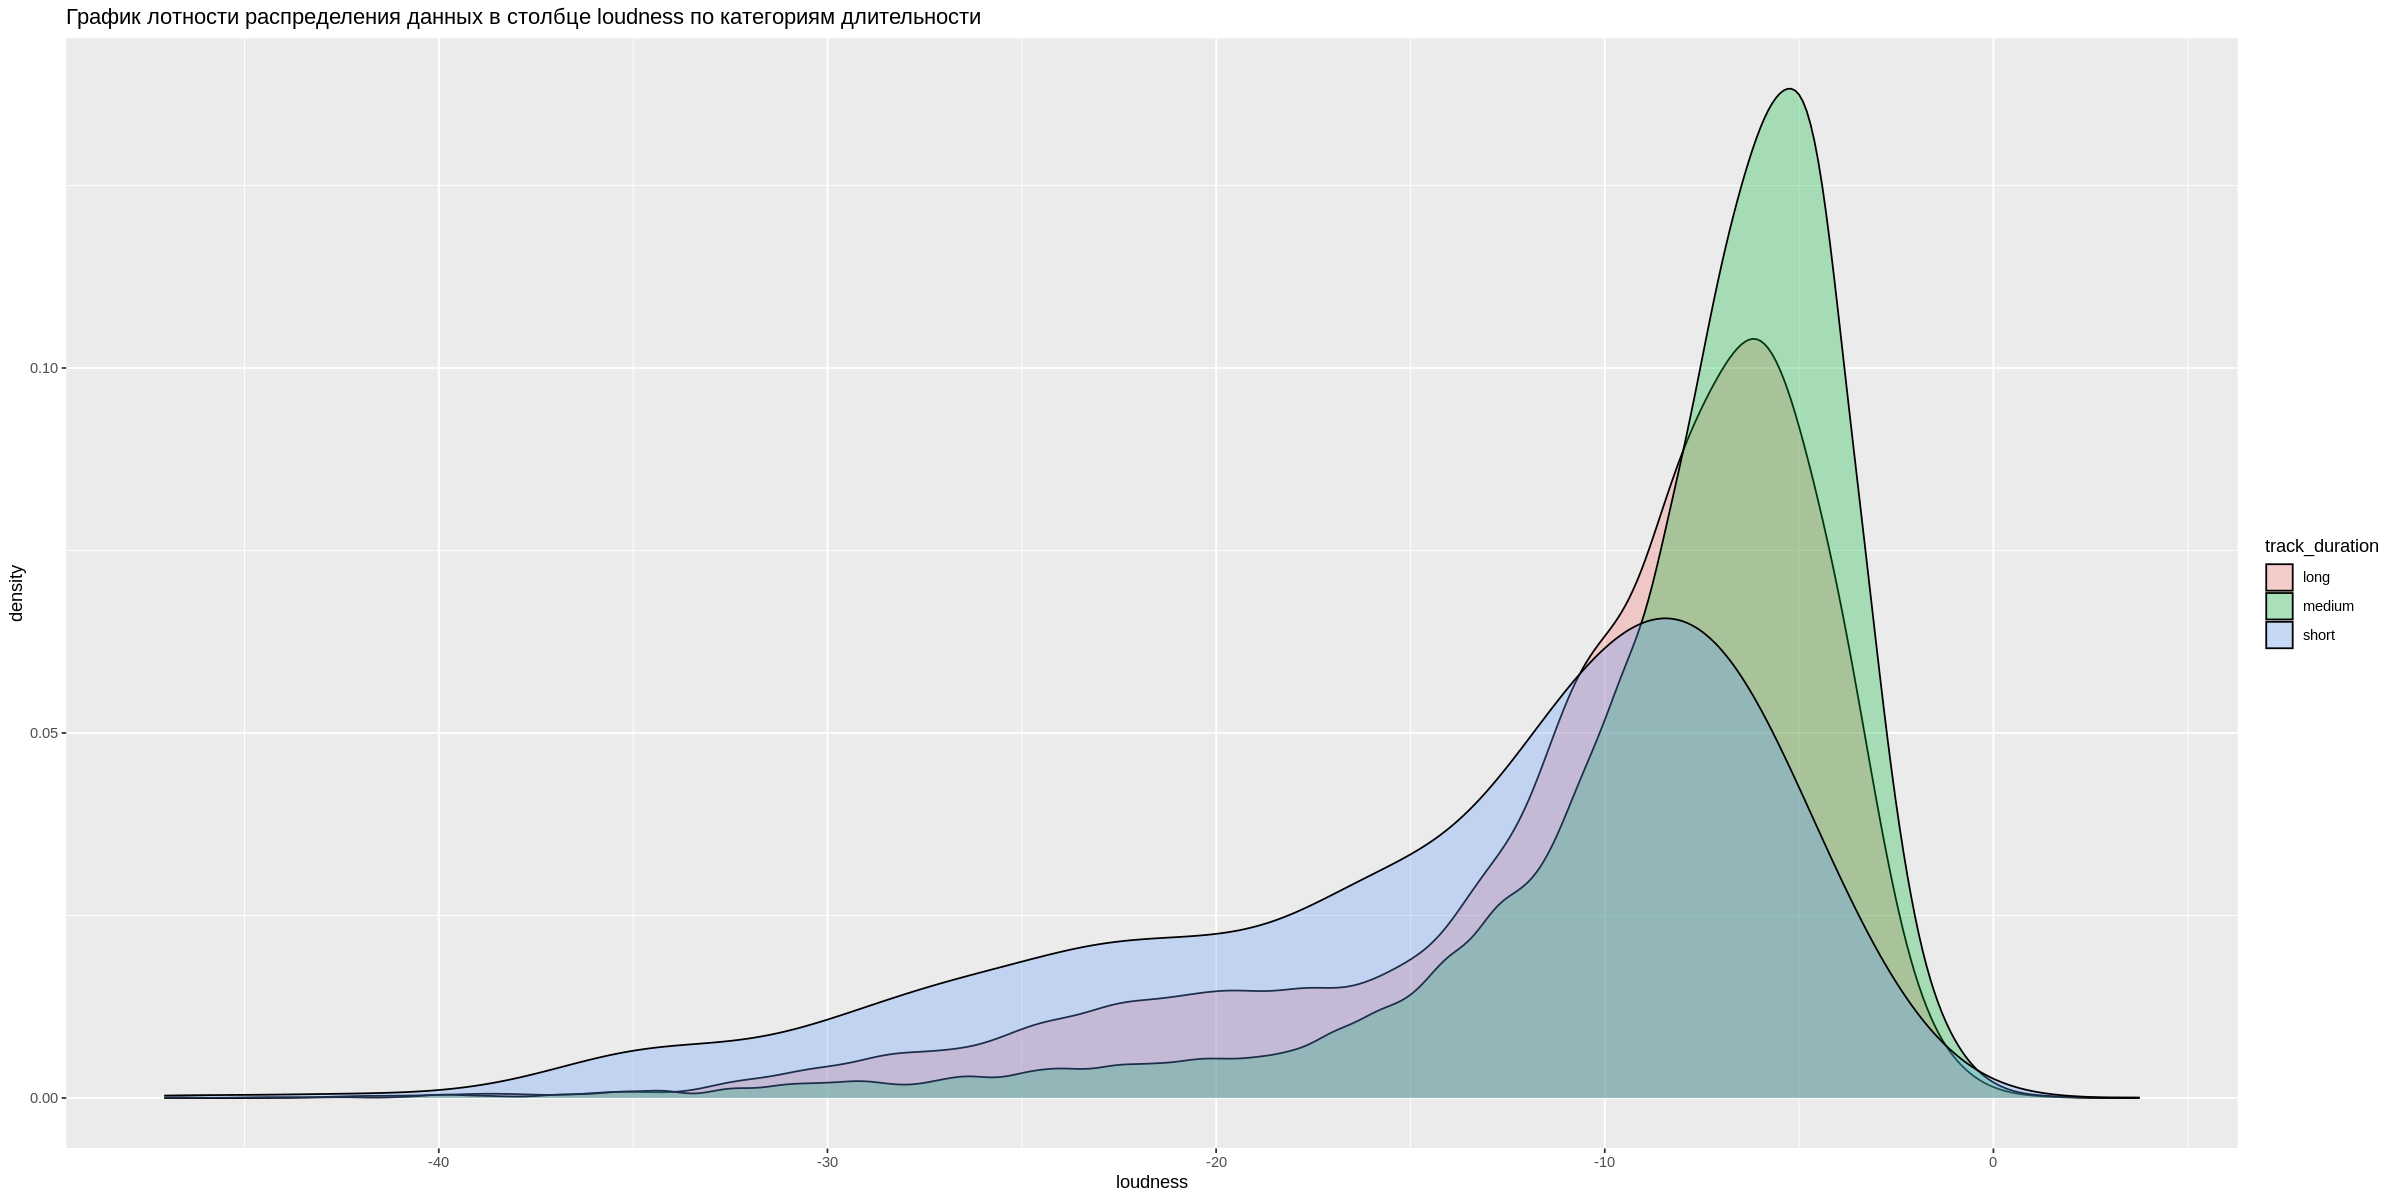

In [ ]:
ggplot(df, aes(x=loudness, fill=track_duration)) + geom_density(alpha=.3) + ggtitle("График плотности распределения данных в столбце loudness по категориям длительности")

## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

In [ ]:
install.packages("viridis")
library(viridis)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



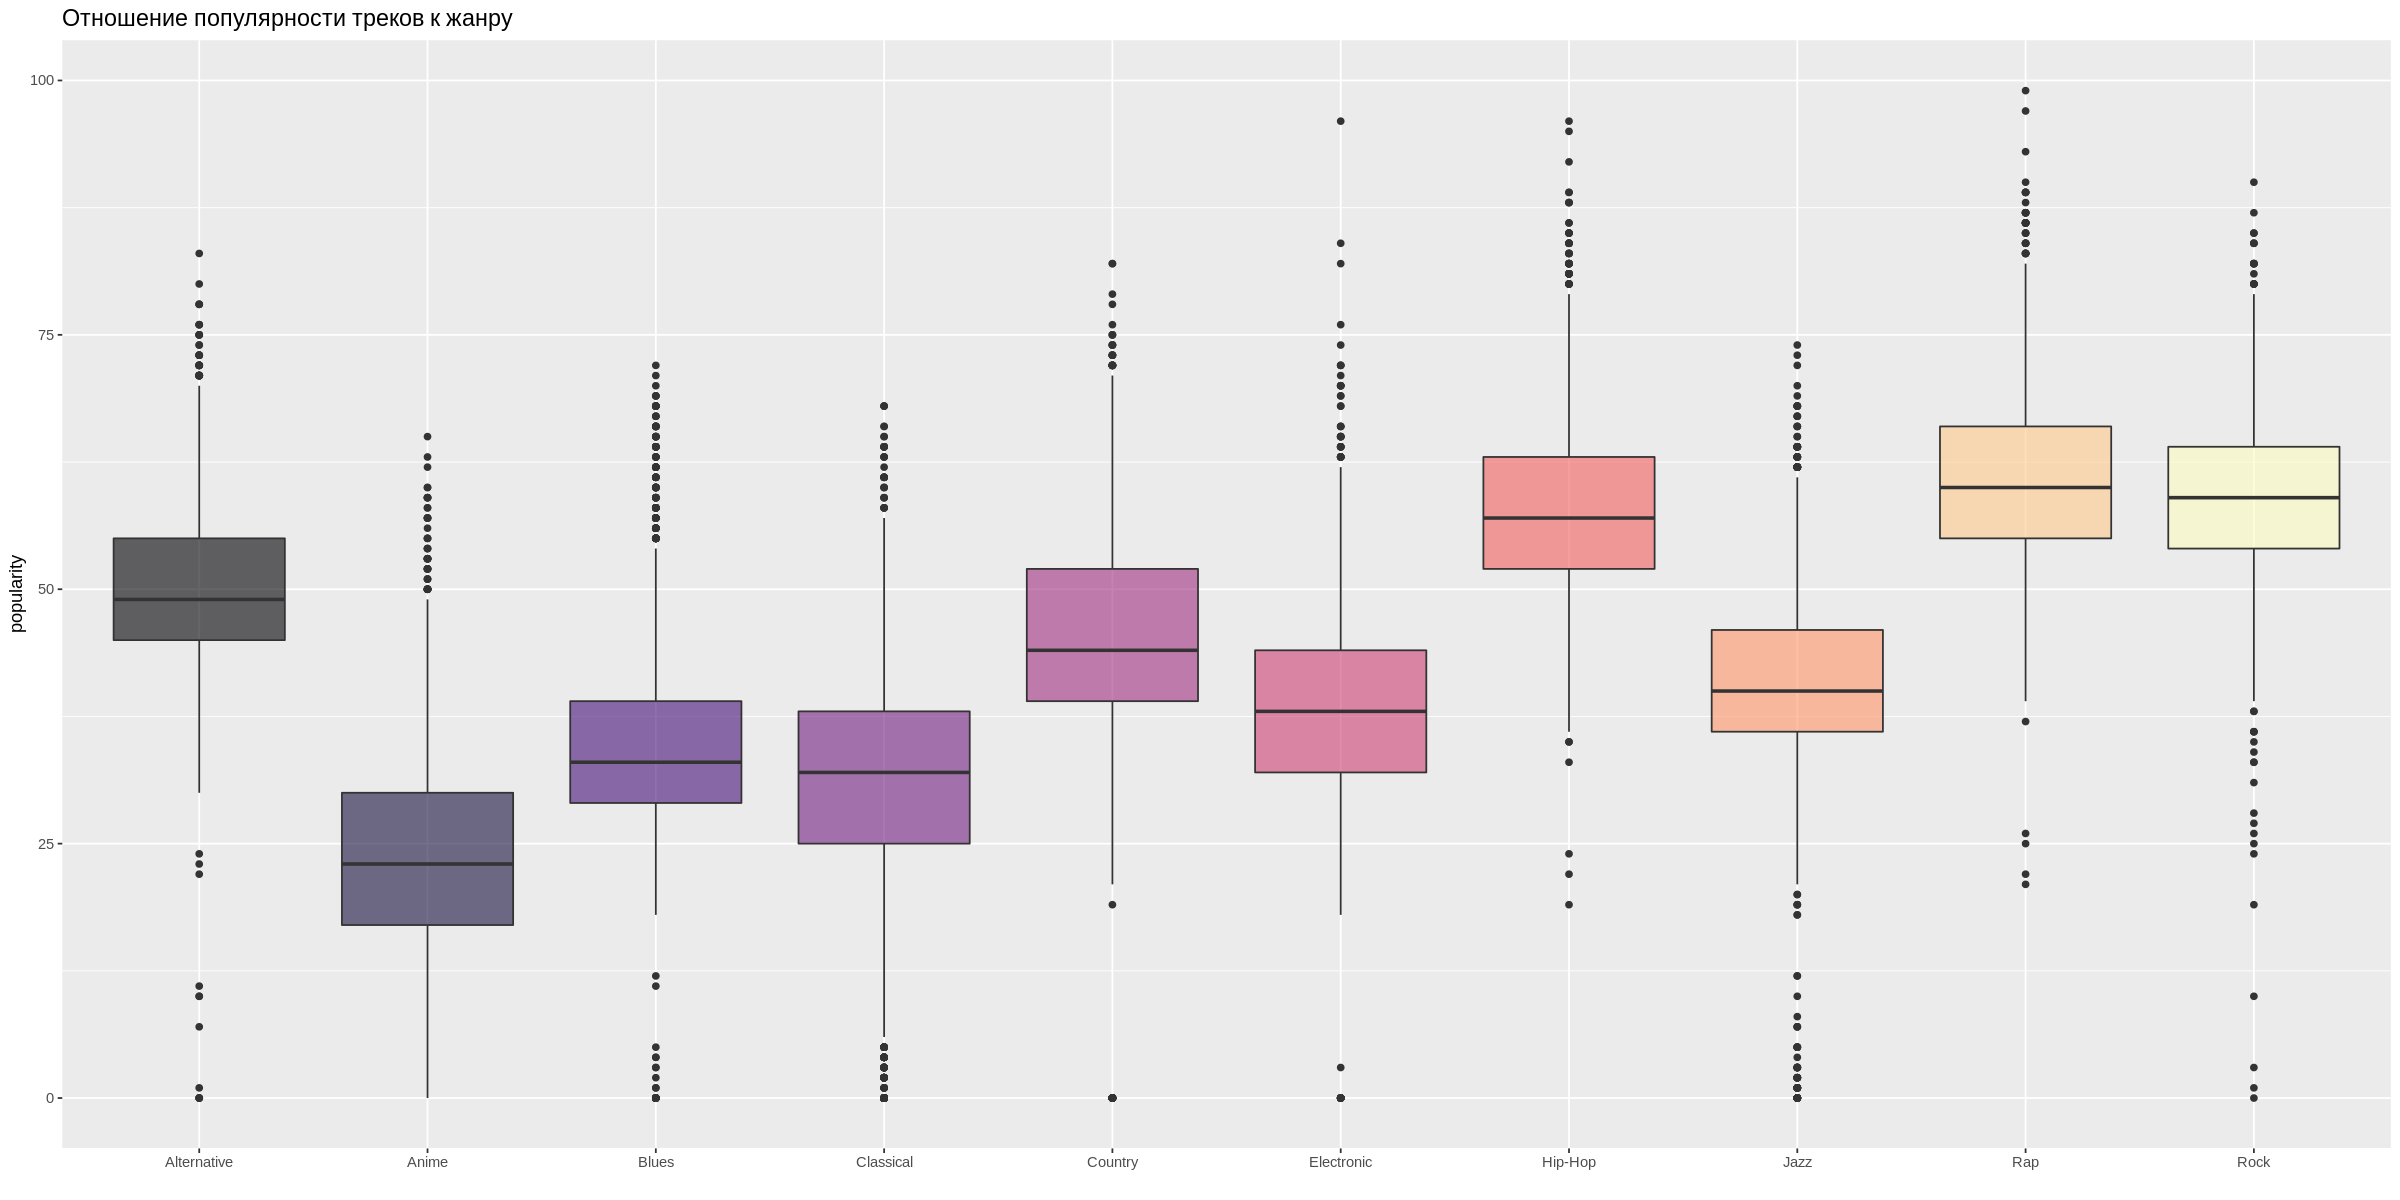

In [ ]:
df %>% ggplot( aes(x=music_genre, y=popularity, fill=music_genre)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme(
      legend.position="none",
      plot.title = element_text(size=14)
    ) +
    ggtitle("Отношение популярности треков к жанру") +
    xlab("")

## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

In [ ]:
pie_data <- as.data.frame(table(df["track_duration"]))

In [ ]:
pie_data

Var1,Freq
<fct>,<int>
long,9723
medium,18851
short,1426


In [ ]:
pie_data$fraction <- pie_data$Freq / sum(pie_data$Freq)

pie_data$ymax <- cumsum(pie_data$fraction)

pie_data$ymin <- c(0, head(pie_data$ymax, n=-1))

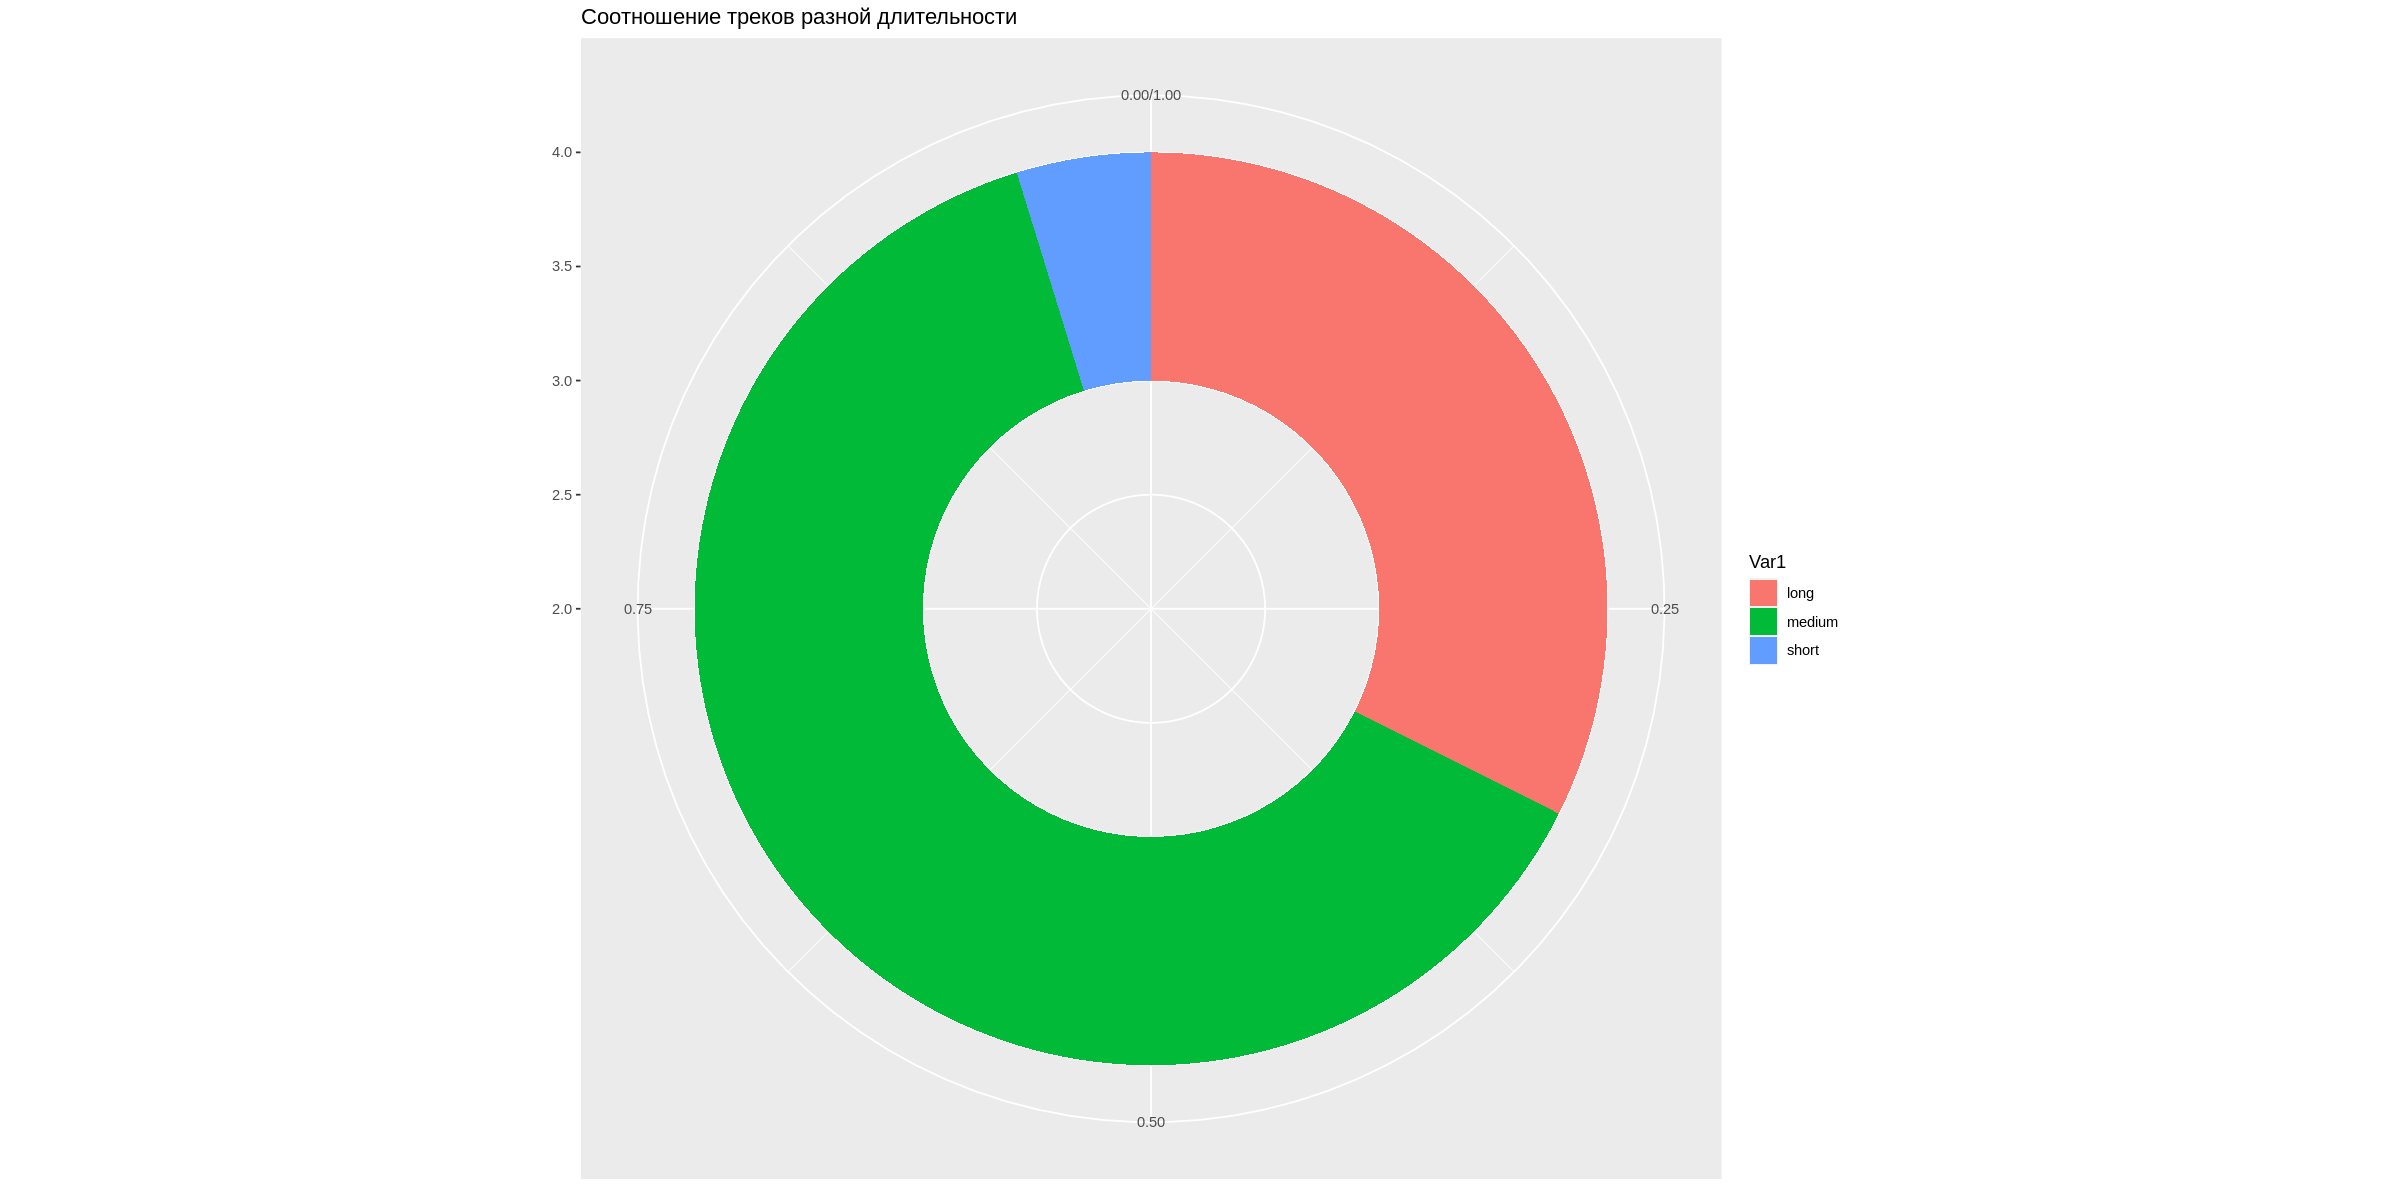

In [ ]:
ggplot(pie_data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Var1)) +
     geom_rect() +
     coord_polar(theta="y") + xlim(c(2, 4)) + 
     ggtitle("Соотношение треков разной длительности")